In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tuning import HyperParameters, full_markowitz, Targets, tune_parameters, tune_in_parallel, solve_hard_markowitz, run_hard_backtest, run_soft_backtest

# increase standard plt font size   
plt.rcParams.update({'font.size': 10})

# autoreload modules
%load_ext autoreload
%autoreload 2

In [2]:
steps = 750

prices = pd.read_csv("../data/prices.csv", index_col=0, parse_dates=True).iloc[:]
spread = pd.read_csv("../data/spreads.csv", index_col=0, parse_dates=True).iloc[:]
volumes_shares = pd.read_csv("../data/volumes_shares.csv", index_col=0, parse_dates=True).iloc[:]
volume = volumes_shares * prices
# volume = pd.read_csv("../data/volumes.csv", index_col=0, parse_dates=True).iloc[:] #* prices
rf = pd.read_csv("../data/rf.csv", index_col=0, parse_dates=True).iloc[:, 0].iloc[:]
# returns = prices.pct_change().dropna()


train_len = 500
test_len = 500

# -500 since first 500 re discarded in backtest
prices_hard = prices.iloc[:1750]
spread_hard = spread.iloc[:1750]
volume_hard = volume.iloc[:1750]
rf_hard = rf.iloc[:1750]


prices_train = prices.iloc[-train_len-test_len-500:-test_len]
prices_test = prices.iloc[-test_len-500:]
spread_train = spread.iloc[-train_len-test_len-500:-test_len]
spread_test = spread.iloc[-test_len-500:]
volume_train = volume.iloc[-train_len-test_len-500:-test_len]
volume_test = volume.iloc[-test_len-500:]
rf_train = rf.iloc[-train_len-test_len-500:-test_len]
rf_test = rf.iloc[-test_len-500:]

prices_train_test = prices.iloc[-train_len-test_len-500:]
spread_train_test = spread.iloc[-train_len-test_len-500:]
volume_train_test = volume.iloc[-train_len-test_len-500:]
rf_train_test = rf.iloc[-train_len-test_len-500:]

returns_train = prices_train.pct_change().dropna()
returns_test = prices_test.pct_change().dropna()

n_assets = prices.shape[1]

In [214]:
targets = Targets(
        T_max=50/252,
        L_max=1.6,
        risk_target=0.1/np.sqrt(252),
    )    

hyperparameters = HyperParameters(1,1, 0, 0, 0)

results_hard_dual = run_hard_backtest(
    solve_hard_markowitz,
    targets,
    hyperparameters,
    prices_hard,
    spread_hard,
    volume_hard,
    rf_hard,
    verbose=True,
)

Day 500 of 1745, 2001-12-04 00:00:00
Day 501 of 1745, 2001-12-05 00:00:00
Day 502 of 1745, 2001-12-06 00:00:00
Day 503 of 1745, 2001-12-07 00:00:00
Day 504 of 1745, 2001-12-10 00:00:00
Day 505 of 1745, 2001-12-11 00:00:00
Day 506 of 1745, 2001-12-12 00:00:00
Day 507 of 1745, 2001-12-13 00:00:00
Day 508 of 1745, 2001-12-14 00:00:00
Day 509 of 1745, 2001-12-17 00:00:00
Day 510 of 1745, 2001-12-18 00:00:00
Day 511 of 1745, 2001-12-19 00:00:00
Day 512 of 1745, 2001-12-20 00:00:00
Day 513 of 1745, 2001-12-21 00:00:00
Day 514 of 1745, 2001-12-24 00:00:00
Day 515 of 1745, 2001-12-25 00:00:00
Day 516 of 1745, 2001-12-26 00:00:00
Day 517 of 1745, 2001-12-27 00:00:00
Day 518 of 1745, 2001-12-28 00:00:00
Day 519 of 1745, 2001-12-31 00:00:00
Day 520 of 1745, 2002-01-01 00:00:00
Day 521 of 1745, 2002-01-02 00:00:00
Day 522 of 1745, 2002-01-03 00:00:00
Day 523 of 1745, 2002-01-04 00:00:00
Day 524 of 1745, 2002-01-07 00:00:00
Day 525 of 1745, 2002-01-08 00:00:00
Day 526 of 1745, 2002-01-09 00:00:00
D

In [217]:
print(f"risk: {results_hard_dual.dual_optimals.Risk.quantile(0.7)}")
print(f"turnover: {results_hard_dual.dual_optimals.Turnover.quantile(0.7)}")
print(f"leverage: {0.25 * results_hard_dual.dual_optimals.Leverage.quantile(1)}")

risk: 0.06833659693983092
turnover: 0.0026686404079282263
leverage: 0.00041644380230918405


In [36]:
print(f"risk: {results_hard_dual.dual_optimals.Risk.quantile(0.75)}")
print(f"turnover: {results_hard_dual.dual_optimals.Turnover.quantile(0.75)}")
print(f"leverage: {0.25 * results_hard_dual.dual_optimals.Leverage.quantile(1)}")

risk: 0.08134864711520241
turnover: 0.0027905546266710755
leverage: 0.00041644380230918405


In [198]:
targets = Targets(
        T_max=50/252,
        L_max=1.6,
        risk_target=0.1/np.sqrt(252),
    ) 

hyperparameters = HyperParameters(1,1, 2.5e-3, 5e-4, 5e-2)

results_hard = run_hard_backtest(
    solve_hard_markowitz,
    targets,
    hyperparameters,
    None,
    None,
    None,
    None,
    verbose=True,
)

Day 500 of 4936, 2006-09-19 00:00:00
Day 501 of 4936, 2006-09-20 00:00:00
Day 502 of 4936, 2006-09-21 00:00:00
Day 503 of 4936, 2006-09-22 00:00:00
Day 504 of 4936, 2006-09-25 00:00:00
Day 505 of 4936, 2006-09-26 00:00:00
Day 506 of 4936, 2006-09-27 00:00:00
Day 507 of 4936, 2006-09-28 00:00:00
Day 508 of 4936, 2006-09-29 00:00:00
Day 509 of 4936, 2006-10-02 00:00:00
Day 510 of 4936, 2006-10-03 00:00:00
Day 511 of 4936, 2006-10-04 00:00:00
Day 512 of 4936, 2006-10-05 00:00:00
Day 513 of 4936, 2006-10-06 00:00:00
Day 514 of 4936, 2006-10-09 00:00:00
Day 515 of 4936, 2006-10-10 00:00:00
Day 516 of 4936, 2006-10-11 00:00:00
Day 517 of 4936, 2006-10-12 00:00:00
Day 518 of 4936, 2006-10-13 00:00:00
Day 519 of 4936, 2006-10-16 00:00:00
Day 520 of 4936, 2006-10-17 00:00:00
Day 521 of 4936, 2006-10-18 00:00:00
Day 522 of 4936, 2006-10-19 00:00:00
Day 523 of 4936, 2006-10-20 00:00:00
Day 524 of 4936, 2006-10-23 00:00:00
Day 525 of 4936, 2006-10-24 00:00:00
Day 526 of 4936, 2006-10-25 00:00:00
D

In [219]:
print(f"mean: {results_hard.mean_return}")
print(f"volatility: {results_hard.volatility}")
print(f"max drawdown: {results_hard.max_drawdown}")
print(f"max leverage: {results_hard.max_leverage}")
print(f"sharpe: {results_hard.sharpe}")
print(f"turnover: {results_hard.turnover}")

mean: 0.343762012579691
volatility: 0.08024008223790434
max drawdown: -0.05845283257323575
max leverage: 1.600167639172014
sharpe: 4.175623505154787
turnover: 51.777695861245746


In [182]:
targets = Targets(
        T_max=50/252,
        L_max=1.6,
        risk_target=0.1/np.sqrt(252),
    ) 

hyperparameters = HyperParameters(1,1, 2.5e-3, 5e-4, 5e-2)

results_soft = run_soft_backtest(
    full_markowitz,
    targets,
    hyperparameters,
    None,
    None,
    None,
    None,
    verbose=True,
)

Day 500 of 4940, 2006-09-19 00:00:00
Day 600 of 4940, 2007-02-06 00:00:00
Day 700 of 4940, 2007-06-26 00:00:00
Day 800 of 4940, 2007-11-13 00:00:00
Day 900 of 4940, 2008-04-01 00:00:00
Day 1000 of 4940, 2008-08-19 00:00:00
Day 1100 of 4940, 2009-01-06 00:00:00
Day 1200 of 4940, 2009-05-26 00:00:00
Day 1300 of 4940, 2009-10-13 00:00:00
Day 1400 of 4940, 2010-03-02 00:00:00
Day 1500 of 4940, 2010-07-20 00:00:00
Day 1600 of 4940, 2010-12-07 00:00:00
Day 1700 of 4940, 2011-04-26 00:00:00
Day 1800 of 4940, 2011-09-13 00:00:00
Day 1900 of 4940, 2012-01-31 00:00:00
Day 2000 of 4940, 2012-06-19 00:00:00
Day 2100 of 4940, 2012-11-06 00:00:00
Day 2200 of 4940, 2013-03-26 00:00:00
Day 2300 of 4940, 2013-08-13 00:00:00
Day 2400 of 4940, 2013-12-31 00:00:00
Day 2500 of 4940, 2014-05-20 00:00:00
Day 2600 of 4940, 2014-10-07 00:00:00
Day 2700 of 4940, 2015-02-24 00:00:00
Day 2800 of 4940, 2015-07-14 00:00:00
Day 2900 of 4940, 2015-12-01 00:00:00
Day 3000 of 4940, 2016-04-19 00:00:00
Day 3100 of 4940,

In [184]:
print(f"mean: {results_soft.mean_return:.1%}")
print(f"volatility: {results_soft.volatility:.1%}")
print(f"max drawdown: {results_soft.max_drawdown:.1%}")
print(f"max leverage: {results_soft.max_leverage:.2f}")
print(f"sharpe: {results_soft.sharpe:.2f}")
print(f"turnover: {results_soft.turnover:.2f}")

mean: 38.6%
volatility: 8.7%
max drawdown: -7.0%
max leverage: 1.75
sharpe: 4.32
turnover: 56.05


In [223]:
prices_train = all_prices[15]
time_last = prices_train.index[-1]

prices_test = prices.loc[time_last:].iloc[1:1+250,:]

prices_train_test = pd.concat([prices_train, prices_test], axis=0)
spread_train_test = spread.loc[prices_train_test.index]
volume_train_test = volume.loc[prices_train_test.index]
rf_train_test = rf.loc[prices_train_test.index]

In [225]:
prices_train_test.iloc[500:1000]

,T0,T1,T3,T4,T5,T6,T7,T8,T9,T10,...,T89,T90,T92,T93,T94,T95,T96,T98,T99,T100
2016-04-19,57.0748,36.8217,120.093,66.0470,51.6081,73.1754,36.6775,96.8350,37.4870,60.7326,...,66.5631,66.9623,141.397,84.670,65.1763,84.4796,185.899,63.3174,54.9000,40.1038
2016-04-20,58.3767,36.5884,118.183,65.5130,52.3579,74.0418,34.9223,97.4293,37.5030,61.1482,...,66.4167,66.9009,138.315,84.139,65.6520,84.0492,185.956,65.6048,54.9553,40.5621
2016-04-21,58.9064,35.3723,118.337,65.2558,51.8363,73.8307,34.3635,97.0897,36.8259,61.1412,...,66.6665,66.4540,135.307,83.204,65.5185,82.9915,185.538,64.9960,55.3793,40.2405
2016-04-22,59.1937,35.7400,118.618,64.9737,52.1379,74.2748,35.0561,97.9011,37.9331,61.6625,...,67.0629,66.6468,137.242,83.624,65.9106,83.1719,186.161,65.7179,54.7802,40.6988
2016-04-25,58.9872,35.8884,118.346,63.7045,51.8363,73.9108,35.1899,98.6558,36.8577,61.5216,...,67.1577,66.7695,138.281,83.267,66.2444,83.5900,185.726,65.2221,54.5774,40.6103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-13,88.1926,37.2659,324.344,134.3969,98.8866,91.8424,37.1473,100.8779,44.9693,56.4923,...,71.8938,78.0076,115.920,92.048,72.3438,58.3012,288.160,89.4844,62.5731,49.0338
2018-03-14,87.4158,37.1127,316.289,133.3912,97.7808,90.7936,36.8110,101.0432,44.9693,55.7874,...,71.2943,78.2250,116.671,91.568,71.3298,57.2761,286.621,88.0175,62.6015,48.2416
2018-03-15,87.2864,36.9901,316.021,135.1664,98.0274,91.1485,36.7185,100.4014,45.0276,56.4090,...,71.5305,77.4643,115.280,92.376,71.0958,56.2595,287.961,88.7872,62.7812,48.4120
2018-03-16,88.4145,37.1970,316.490,136.8192,98.1976,91.0065,36.5419,100.0415,45.7777,56.9396,...,73.1109,78.7865,115.670,93.378,70.4544,56.0802,286.380,89.9734,62.3273,47.6197


In [226]:
prices_train_test.iloc[1000:]

,T0,T1,T3,T4,T5,T6,T7,T8,T9,T10,...,T89,T90,T92,T93,T94,T95,T96,T98,T99,T100
2018-03-20,87.8042,36.5305,323.348,134.7204,97.5171,90.2967,36.2897,98.5633,45.5860,56.0830,...,71.1853,77.6364,113.793,90.953,69.2497,53.7652,290.009,89.3486,63.1689,46.7679
2018-03-21,87.6100,36.2165,322.840,136.2420,97.6021,92.2998,36.1551,99.0204,47.5361,56.8789,...,71.0672,79.0129,113.616,90.633,69.3710,53.3210,289.897,88.9049,62.7434,46.6742
2018-03-22,84.5306,35.9101,306.090,128.4592,93.5276,89.6659,35.9534,97.8340,47.0861,55.7116,...,69.5140,77.6092,112.284,87.939,68.1158,52.7828,282.707,85.7084,60.9183,44.7489
2018-03-23,83.6429,35.4581,307.421,126.1769,91.0267,89.0980,35.5918,95.8306,48.1195,55.2493,...,67.9063,75.8614,111.695,85.590,66.7297,51.9884,290.623,83.6619,61.1168,43.4285
2018-03-26,85.6496,36.0556,315.054,130.4618,93.8338,90.9671,35.8945,97.8826,49.2362,56.0906,...,69.1961,80.8693,112.865,87.308,68.3947,52.6205,297.207,86.0887,62.3178,44.5445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-02-26,100.3882,45.4021,416.775,123.5776,91.8809,98.2455,38.5355,112.1296,58.4183,62.1475,...,115.8516,96.9955,141.263,96.565,80.9061,53.3954,269.608,74.5889,81.8051,43.6126
2019-02-27,100.8387,45.4662,425.242,125.0106,91.7675,98.3602,38.7511,111.4183,58.6725,62.7875,...,116.7902,99.3874,139.690,96.643,80.5516,51.4771,271.106,75.8428,82.1579,43.8853
2019-02-28,101.1391,45.6265,429.656,123.0044,91.0694,97.9506,39.0960,111.4775,57.5113,62.4398,...,117.3570,97.0509,139.629,95.834,80.2060,50.8875,274.684,77.0598,81.7384,43.8765
2019-03-01,102.2281,45.6586,430.300,123.1208,91.1304,99.9574,39.1305,112.6334,58.4267,63.2062,...,119.7267,96.0074,135.320,97.513,81.6151,51.1515,274.738,77.6867,83.3156,43.9996


In [96]:
rf_train_test

2006-01-17    0.000120
2006-01-18    0.000118
2006-01-19    0.000117
2006-01-20    0.000118
2006-01-23    0.000118
                ...   
2010-10-26    0.000005
2010-10-27    0.000005
2010-10-28    0.000005
2010-10-29    0.000006
2010-11-01    0.000006
Name: DFF, Length: 1250, dtype: float64

# Tuning

In [121]:
parameter_dict, best_backtest = tune_parameters(
    full_markowitz,
    prices_train_test,
    spread_train_test, 
    volume_train_test,
    rf_train_test,
    train_len=500,
    verbose=True,
)

Initial sharpes: 4.895204224599996, 4.466158231240856
Turnover: 51.73732612784711, 51.842743761984934
Leverage: 1.6186002673962006, 1.6000339923689486
Risk: 0.07952666877005807, 0.08674364917863442

Iteration number 1;                      current sharpes:                          (4.906557599701375, 5.029005068933097)
Hyperparameters: HyperParameters(gamma_hold=0.8, gamma_trade=1, gamma_turn=0.0025, gamma_leverage=0.0005, gamma_risk=0.05)
Turnover: 51.74794719977088, 51.83990983702518
Leverage: 1.6001006445169794, 1.6000376826746068
Risk: 0.07807117525355566, 0.08604972951233318

Iteration number 2;                      current sharpes:                          (4.933547889568876, 4.779472112334166)
Hyperparameters: HyperParameters(gamma_hold=0.8, gamma_trade=0.8, gamma_turn=0.0025, gamma_leverage=0.0005, gamma_risk=0.05)
Turnover: 53.01690384236191, 53.05651979849407
Leverage: 1.6198041246600694, 1.6000416713929786
Risk: 0.07931785675972013, 0.08537670785862234

Iteration number 3;  

In [125]:
train_len

500

In [122]:
parameter_dict[best_backtest][0]

HyperParameters(gamma_hold=0.6400000000000001, gamma_trade=0.6400000000000001, gamma_turn=0.0016, gamma_leverage=0.0005, gamma_risk=0.04000000000000001)

In [126]:
sharpe_ratios_train = []
sharpe_ratios_test = []
volas_train = []
volas_test = []
leverages_train = []
leverages_test = []
turnovers_train = []
turnovers_test = []

gamma_holds = []
gamma_trades = []
gamma_turns = []
gamma_leverages = []
gamma_risks = []

train_len = 500
test_len = len(prices_train_test) - 500 - train_len

def sharpes(results):
        returns_train = results.portfolio_returns.iloc[:-test_len]
        returns_test = results.portfolio_returns.iloc[-test_len:]
        sharpe_train = np.sqrt(results.periods_per_year)*returns_train.mean()/returns_train.std()
        sharpe_test = np.sqrt(results.periods_per_year)*returns_test.mean()/returns_test.std()

        return sharpe_train, sharpe_test

def volas(results):
        vola_train = np.sqrt(results.periods_per_year)*results.portfolio_returns.iloc[:-test_len].std()
        vola_test = np.sqrt(results.periods_per_year)*results.portfolio_returns.iloc[-test_len:].std()
        
        return vola_train, vola_test

def leverages(results):
        leverage_train = results.asset_weights.abs().iloc[:-test_len].sum(axis=1).max()
        leverage_test = results.asset_weights.abs().iloc[-test_len:].sum(axis=1).max()
        
        return leverage_train, leverage_test

def turnovers(results):
        trades = results.quantities.diff()
        valuation_trades = (trades * prices).dropna()
        relative_trades = valuation_trades.div(results.portfolio_value, axis=0)

        turnover_train = relative_trades.abs().sum(axis=1).iloc[:-test_len].mean() * results.periods_per_year
        turnover_test = relative_trades.abs().sum(axis=1).iloc[-test_len:].mean() * results.periods_per_year

        return turnover_train, turnover_test

# SR_best_train = 0
# SR_best_test = 0
for i in parameter_dict.keys():
    sharpe_train, sharpe_test = sharpes(parameter_dict[i][-1])
    vola_train, vola_test = volas(parameter_dict[i][-1])
    leverage_train, leverage_test = leverages(parameter_dict[i][-1])
    turnover_train, turnover_test = turnovers(parameter_dict[i][-1])

    sharpe_ratios_train.append(sharpe_train)
    sharpe_ratios_test.append(sharpe_test)
    
    # vola_train, vola_test = volas(parameter_dict_new[i][1])
    volas_train.append(vola_train)
    volas_test.append(vola_test)
    
    # leverage_train, leverage_test = leverages(parameter_dict_new[i][1])
    leverages_train.append(leverage_train)
    leverages_test.append(leverage_test)
    
    # turnover_train, turnover_test = turnovers(parameter_dict_new[i][1])
    turnovers_train.append(turnover_train)
    turnovers_test.append(turnover_test)
    
    gamma_holds.append(parameter_dict[i][0].gamma_hold)
    gamma_trades.append(parameter_dict[i][0].gamma_trade)
    gamma_turns.append(parameter_dict[i][0].gamma_turn)
    gamma_leverages.append(parameter_dict[i][0].gamma_leverage)
    gamma_risks.append(parameter_dict[i][0].gamma_risk)

In [222]:
backtests

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

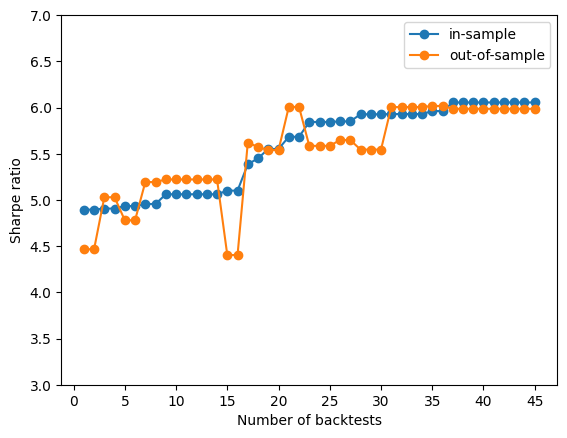

In [232]:
backtests = np.arange(1, len(sharpe_ratios_train)+1)

plt.plot(backtests, sharpe_ratios_train, label="in-sample", marker="o")
plt.plot(backtests, sharpe_ratios_test, label="out-of-sample", marker="o")
plt.ylabel("Sharpe ratio")
plt.xlabel("Number of backtests")
plt.xticks(backtests)
# only show every 5th tick
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(5))

plt.legend()
plt.ylim(3, 7)

# save figure as pdf
# plt.savefig("../../../markowitz/figures/tuning_SR.pdf", bbox_inches='tight')

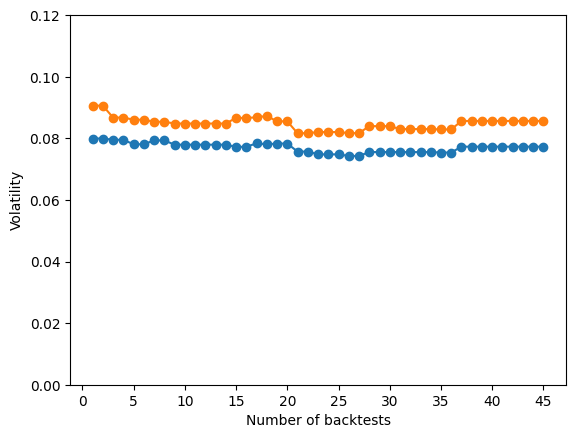

In [239]:
plt.plot(backtests, volas_train, label="train", marker="o")
plt.plot(backtests, volas_test, label="test", marker="o")
plt.ylabel("Volatility")
plt.xlabel("Number of backtests")
plt.xticks(backtests)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(5))
plt.ylim(0.0, 0.12)
# plt.savefig("../../../markowitz/figures/tuning_vola.pdf", bbox_inches='tight')



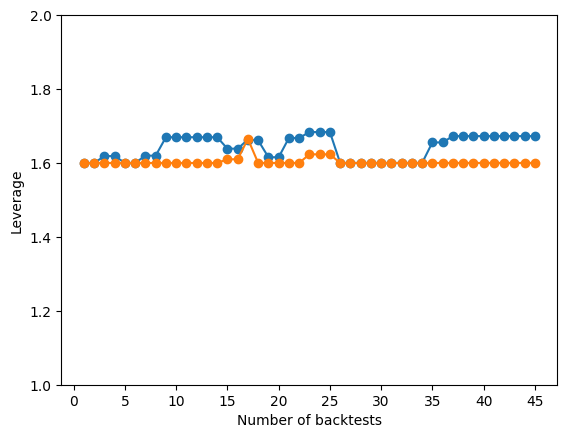

In [240]:
plt.plot(backtests, leverages_train, label="train", marker="o")
plt.plot(backtests, leverages_test, label="test", marker="o")
plt.ylabel("Leverage")
plt.xlabel("Number of backtests")
plt.xticks(backtests)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(5))


# plt.legend()
plt.ylim(1, 2)
# plt.savefig("../../../markowitz/figures/tuning_lev.pdf", bbox_inches='tight')


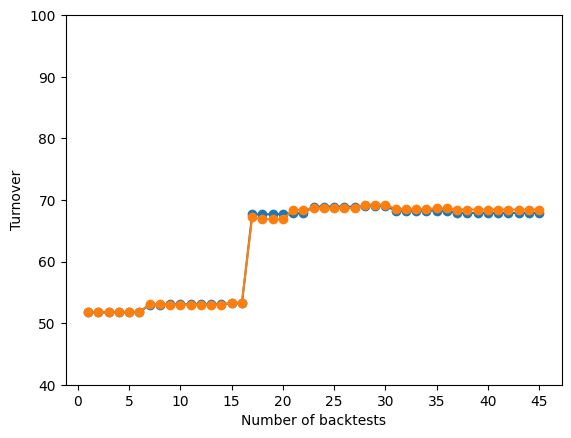

In [241]:
plt.plot(backtests, turnovers_train, label="train", marker="o")
plt.plot(backtests, turnovers_test, label="test", marker="o")
plt.ylabel("Turnover")
plt.xlabel("Number of backtests")
plt.xticks(backtests)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(5))



# plt.legend()
plt.ylim(40, 100)
# plt.savefig("../../../markowitz/figures/tuning_turn.pdf", bbox_inches='tight')

# Full tuning

In [132]:
all_prices = []
all_spreads = []
all_volumes = []
all_rfs = []

# retune every year 
tuning_frequency = 250 # 1 year

t_start = 500
n_periods = int(np.floor(len(prices) / tuning_frequency))

for i in range(1, n_periods): # first 500 are discarded
    t_start = (i-1)*tuning_frequency
    t_end = (i-1)*tuning_frequency + 1000

    all_prices.append(prices.iloc[t_start:t_end])
    all_spreads.append(spread.iloc[t_start:t_end])
    all_volumes.append(volume.iloc[t_start:t_end])
    all_rfs.append(rf.iloc[t_start:t_end])

# remove all of length less than 500
all_prices = [x for x in all_prices if len(x) == 1000]
all_spreads = [x for x in all_spreads if len(x) == 1000]
all_volumes = [x for x in all_volumes if len(x) == 1000]
all_rfs = [x for x in all_rfs if len(x) == 1000]

In [134]:
tuning_results = tune_in_parallel(
    all_prices,
    all_spreads,
    all_volumes,
    all_rfs,
)

Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!


In [149]:
tuning_results = results_quarterly

In [150]:
parameters = {}
for i, res in enumerate(tuning_results):
    time = all_prices[i].index[-1]
    best_backtest = res[-1]
    parameters[time] = res[0][best_backtest][0]

parameters_df = pd.DataFrame(index=prices.index, columns=["gamma_hold", "gamma_trade", "gamma_turn", "gamma_leverage", "gamma_risk"])

for time in parameters.keys():
    params = parameters[time]
    parameters_df.loc[time] = [params.gamma_hold, params.gamma_trade, params.gamma_turn, params.gamma_leverage, params.gamma_risk]

default = HyperParameters(1, 1, 2.5e-3, 5e-4, 5e-2)

parameters_df.iloc[0] = [default.gamma_hold, default.gamma_trade, default.gamma_turn, default.gamma_leverage, default.gamma_risk]

parameters_df = parameters_df.ffill()

In [147]:
hyperparameters = HyperParameters(
    gamma_hold=parameters_df.gamma_hold,
    gamma_trade=parameters_df.gamma_trade,
    gamma_turn=parameters_df.gamma_turn,
    gamma_leverage=parameters_df.gamma_leverage,
    gamma_risk=parameters_df.gamma_risk,
)

targets = Targets(
    T_max=50/252,
    L_max=1.6,
    risk_target=0.1/np.sqrt(252),
)

results_fully_tuned = run_soft_backtest(
            full_markowitz,
            targets=targets,
            hyperparameters=hyperparameters,
            verbose=True,
        )

Day 500 of 4940, 2006-09-19 00:00:00
Day 600 of 4940, 2007-02-06 00:00:00
Day 700 of 4940, 2007-06-26 00:00:00
Day 800 of 4940, 2007-11-13 00:00:00
Day 900 of 4940, 2008-04-01 00:00:00
Day 1000 of 4940, 2008-08-19 00:00:00
Day 1100 of 4940, 2009-01-06 00:00:00
Day 1200 of 4940, 2009-05-26 00:00:00
Day 1300 of 4940, 2009-10-13 00:00:00
Day 1400 of 4940, 2010-03-02 00:00:00
Day 1500 of 4940, 2010-07-20 00:00:00
Day 1600 of 4940, 2010-12-07 00:00:00
Day 1700 of 4940, 2011-04-26 00:00:00
Day 1800 of 4940, 2011-09-13 00:00:00
Day 1900 of 4940, 2012-01-31 00:00:00
Day 2000 of 4940, 2012-06-19 00:00:00
Day 2100 of 4940, 2012-11-06 00:00:00
Day 2200 of 4940, 2013-03-26 00:00:00
Day 2300 of 4940, 2013-08-13 00:00:00
Day 2400 of 4940, 2013-12-31 00:00:00
Day 2500 of 4940, 2014-05-20 00:00:00
Day 2600 of 4940, 2014-10-07 00:00:00
Day 2700 of 4940, 2015-02-24 00:00:00
Day 2800 of 4940, 2015-07-14 00:00:00
Day 2900 of 4940, 2015-12-01 00:00:00
Day 3000 of 4940, 2016-04-19 00:00:00
Day 3100 of 4940,

In [185]:
print(f"mean: {results_fully_tuned.mean_return:.1%}")
print(f"volatility: {results_fully_tuned.volatility:.1%}")
print(f"max drawdown: {results_fully_tuned.max_drawdown:.1%}")
print(f"max leverage: {results_fully_tuned.max_leverage:.2f}")
print(f"sharpe: {results_fully_tuned.sharpe:.2f}")
print(f"turnover: {results_fully_tuned.turnover:.2f}")

mean: 41.8%
volatility: 8.8%
max drawdown: -6.4%
max leverage: 1.63
sharpe: 4.65
turnover: 77.22


In [180]:
parameters_df.columns

Index(['gamma_hold', 'gamma_trade', 'gamma_turn', 'gamma_leverage',
       'gamma_risk'],
      dtype='object')

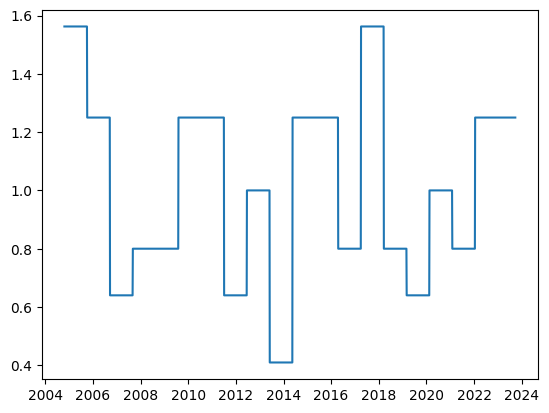

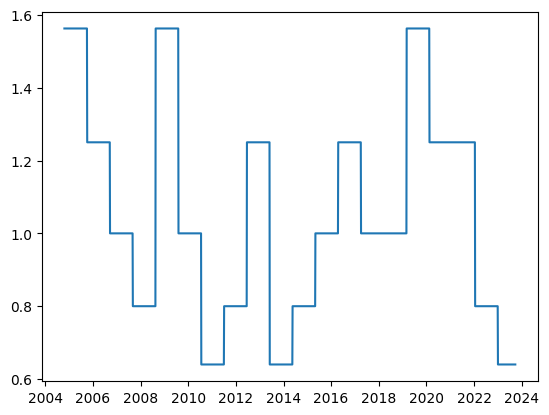

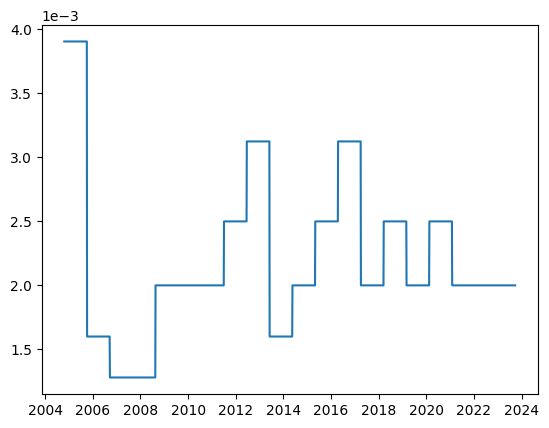

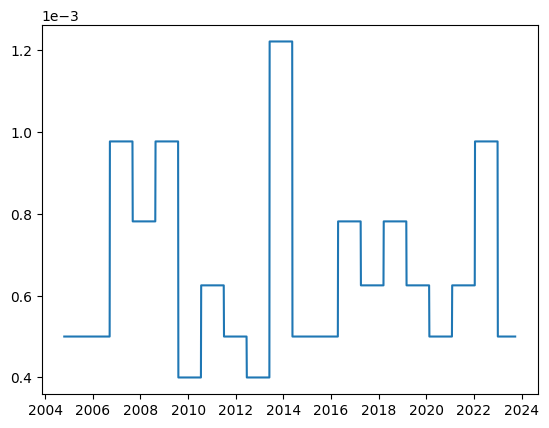

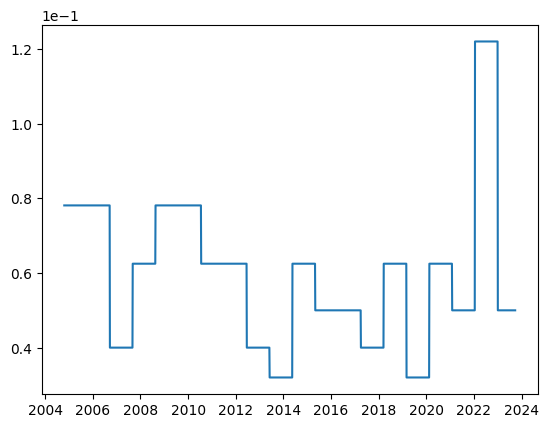

In [242]:
tuning_len = 1250
for param in parameters_df.columns:
    plt.figure()
    plt.plot(parameters_df[param].iloc[tuning_len:], label=param)
    # fix y axis text to not be too wide and write as x 10^x
    plt.gca().get_yaxis().get_major_formatter().set_powerlimits((0, 1))

    # save figure as pdf
    # plt.savefig(f"../../../markowitz/figures/tuning_{param}.pdf", bbox_inches='tight')


### Yearly metrics

In [199]:
port_returns = results_fully_tuned.portfolio_returns

yearly_means_tuned = port_returns.resample("Y").mean() * results_fully_tuned.periods_per_year
yearly_volas_tuned = port_returns.resample("Y").std() * np.sqrt(results_fully_tuned.periods_per_year)
yearly_sharpes_tuned = yearly_means_tuned / yearly_volas_tuned

yearly_means_plus_plus = results_soft.portfolio_returns.resample("Y").mean() * results_soft.periods_per_year
yearly_volas_plus_plus = results_soft.portfolio_returns.resample("Y").std() * np.sqrt(results_soft.periods_per_year)
yearly_sharpes_plus_plus = yearly_means_plus_plus / yearly_volas_plus_plus

yearly_means_hard = results_hard.portfolio_returns.resample("Y").mean() * results_hard.periods_per_year
yearly_volas_hard = results_hard.portfolio_returns.resample("Y").std() * np.sqrt(results_hard.periods_per_year)
yearly_sharpes_hard = yearly_means_hard / yearly_volas_hard



In [166]:
yearly_means_tuned.shape

(18,)

In [165]:
equal_means.shape

(18,)

In [167]:
equal_means = pd.Series(np.array([33.6, 13.1, -26.3, 38.6, 17.6, 6.2, 20.3, 30.7, 15.8, 4.3, 15.0, 20.9, -1.9, 27.8, 20.1, 27.3, -5.9, 10.7]), index = yearly_means_tuned.index) / 100

basic_means = pd.Series([-52.6, -69.7, -13.5, 6.7, -45.6, 0.4, 21.8, -0.0, -16.3, 11.2, 9.9, 23.5, 22.1, 2.1, 70.6, 5.6, 34.2, 25.0], index = yearly_means_tuned.index) / 100

equal_volas = pd.Series([8.5, 15.6, 42.0, 30.1, 17.3, 22.8, 12.3, 11.0, 10.8, 15.1, 12.8, 6.6, 16.0, 12.0, 35.8, 12.2, 20.8, 12.4], index = yearly_means_tuned.index) / 100
basic_volas = pd.Series([13.5, 15.3, 23.5, 13.8, 9.7, 11.0, 12.5, 11.8, 10.8, 13.4, 14.4, 13.9, 15.2, 13.2, 21.6, 11.2, 14.0, 12.3], index = yearly_means_tuned.index) / 100

equal_sharpes = pd.Series([3.51, 0.61, -0.66, 1.28, 1.01, 0.27, 1.64, 2.78, 1.46, 0.28, 1.15, 3.08, -0.20, 2.17, 0.55, 2.24, -0.34, 0.58], index = yearly_means_tuned.index) 
basic_sharpes = pd.Series([-4.18, -4.81, -0.64, 0.47, -4.71, 0.03, 1.74, -0.01, -1.51, 0.82, 0.67, 1.64, 1.37, 0.04, 3.25, 0.49, 2.35, 1.74], index = yearly_means_tuned.index) 

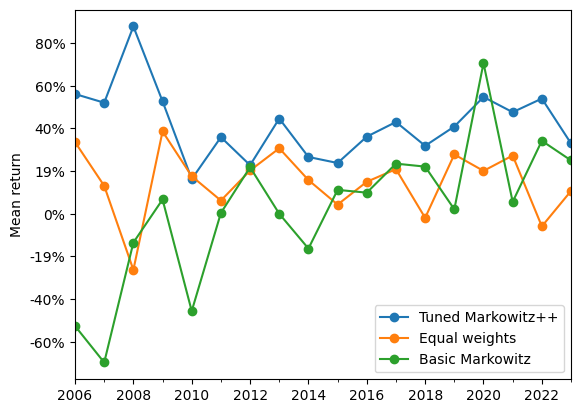

In [249]:
yearly_means_tuned.plot(label="Tuned Markowitz++", marker="o")  
# yearly_means_hard.plot(label="Hard Markowitz", marker="o")
equal_means.plot(label="Equal weights", marker="o")  
basic_means.plot(label="Basic Markowitz", marker="o")  
plt.ylabel("Mean return")
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}%".format(int(x*100))))
plt.legend();

# save as pdf
# plt.savefig("../../../markowitz/figures/yearly_means.pdf", bbox_inches='tight')

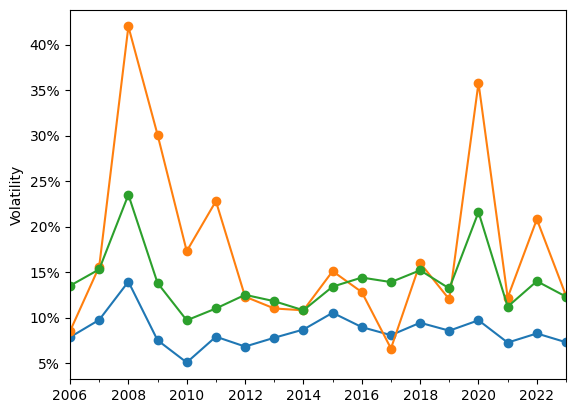

In [248]:

yearly_volas_tuned.plot(label="Tuned Markowitz++", marker="o")
# yearly_volas_hard.plot(label="Hard Markowitz", marker="o")

equal_volas.plot(label="Equal weights", marker="o")
basic_volas.plot(label="Basic Markowitz", marker="o")
plt.ylabel("Volatility")
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}%".format(int(x*100))));

# plt.savefig("../../../markowitz/figures/yearly_volas.pdf", bbox_inches='tight')

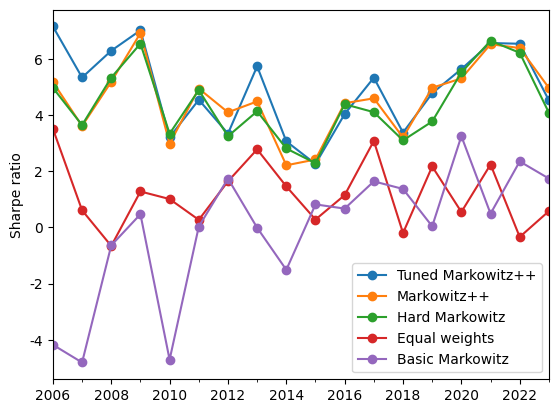

In [251]:
yearly_sharpes_tuned.plot(label="Tuned Markowitz++", marker="o")
yearly_sharpes_plus_plus.plot(label="Markowitz++", marker="o")
yearly_sharpes_hard.plot(label="Hard Markowitz", marker="o")

equal_sharpes.plot(label="Equal weights", marker="o")
basic_sharpes.plot(label="Basic Markowitz", marker="o")
plt.ylabel("Sharpe ratio")
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))));
plt.legend();

# plt.savefig("../../../markowitz/figures/yearly_sharpes.pdf", bbox_inches='tight')